In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"debrinaazzahra","key":"07023d9a2d93ce01ea362ab146b1cadc"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d mattop/dairy-queen-menu-nutrition-data --force

  0% 0.00/5.49k [00:00<?, ?B/s]
100% 5.49k/5.49k [00:00<00:00, 11.0MB/s]


In [6]:
!mkdir dairy-queen-menu-nutrition-data
!unzip dairy-queen-menu-nutrition-data.zip -d dairy-queen-menu-nutrition-data
!ls dairy-queen-menu-nutrition-data

Archive:  dairy-queen-menu-nutrition-data.zip
  inflating: dairy-queen-menu-nutrition-data/dairy-queen-menu-nutrition.csv  
dairy-queen-menu-nutrition.csv


In [7]:
df = pd.read_csv("/content/drive/MyDrive/estimasi_kalori/dairy_queen.csv")
df.head(5)

,Menu,Calories,Fat_Calories,Total_Fat,Cholesterol,Sodium,Carbohydrates,Sugars,Protein
0,Caramel Mocha Chip Shake - Small,600,100,27.0,45,240,79,65,12.0
1,Caramel Mocha Chip Shake - Medium,830,170,39.0,55,310,106,86,16.0
2,Caramel Mocha Chip Shake - Large,1100,230,52.0,75,410,140,113,20.0
3,Cinnamon Roll Centers Blizzard - Mini,360,300,13.0,45,150,53,43,8.0
4,Cinnamon Roll Centers Blizzard - Small,620,240,22.0,85,270,93,75,13.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Menu           229 non-null    object 
 1   Calories       229 non-null    int64  
 2   Fat_Calories   229 non-null    int64  
 3   Total_Fat      229 non-null    float64
 4   Cholesterol    229 non-null    int64  
 5   Sodium         229 non-null    int64  
 6   Carbohydrates  229 non-null    int64  
 7   Sugars         229 non-null    int64  
 8   Protein        229 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 16.2+ KB


<Axes: >

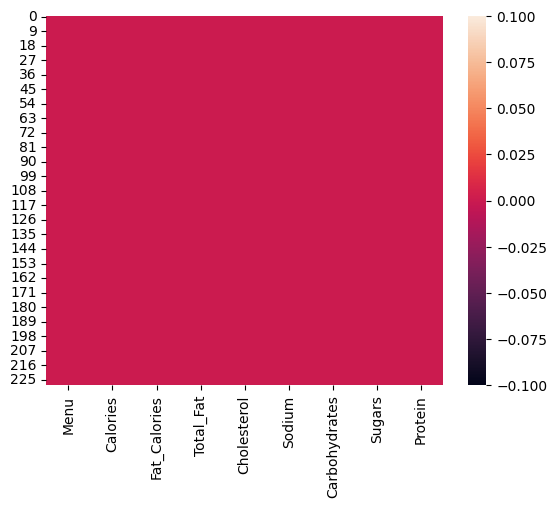

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,Calories,Fat_Calories,Total_Fat,Cholesterol,Sodium,Carbohydrates,Sugars,Protein
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,567.292576,207.694323,23.093013,46.004367,469.759825,77.489083,58.270742,13.479476
std,313.542447,151.594545,16.852665,36.692714,514.575544,45.169623,42.420783,9.637712
min,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,330.000000,100.000000,12.000000,25.000000,180.000000,40.000000,14.000000,8.000000
50%,500.000000,180.000000,20.000000,45.000000,290.000000,73.000000,58.000000,12.000000
75%,760.000000,290.000000,32.000000,65.000000,520.000000,106.000000,87.000000,18.000000
max,1510.000000,650.000000,72.000000,180.000000,2710.000000,203.000000,158.000000,49.000000


<Figure size 640x480 with 0 Axes>

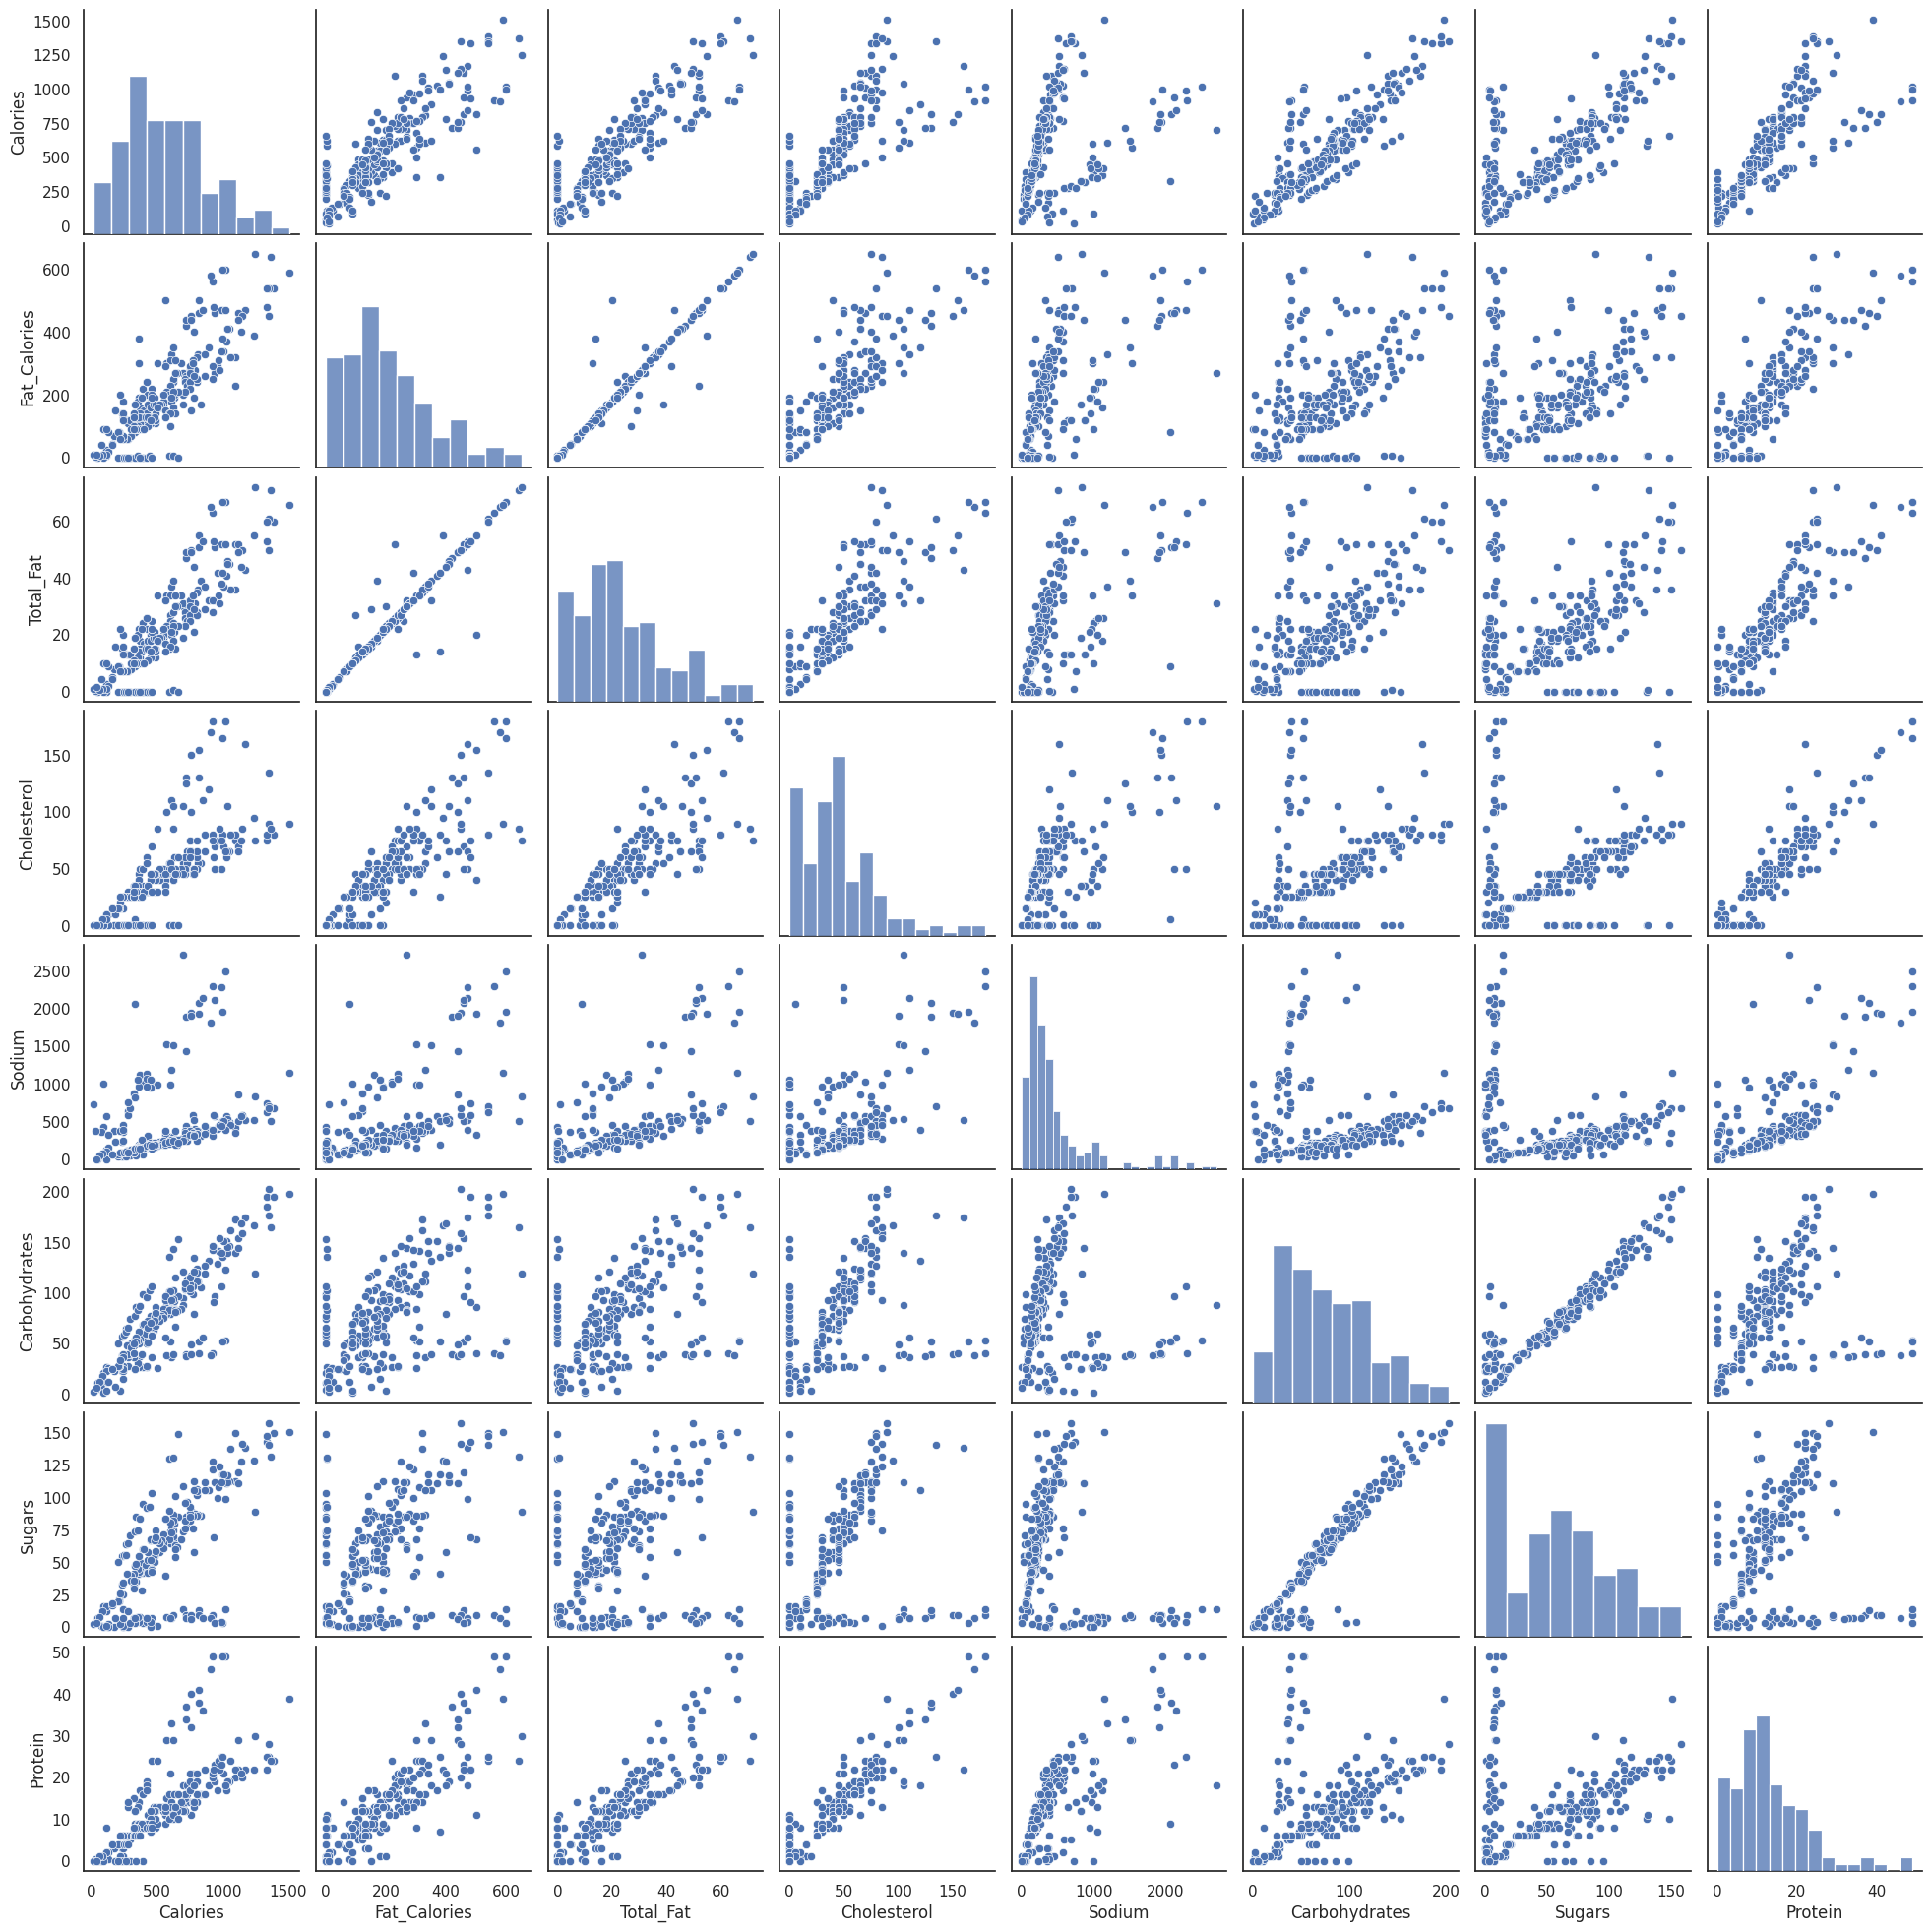

In [11]:
sns.set_theme(style="white")
sns.despine()

sns.pairplot(df);

<ipython-input-12-43b181235e54>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

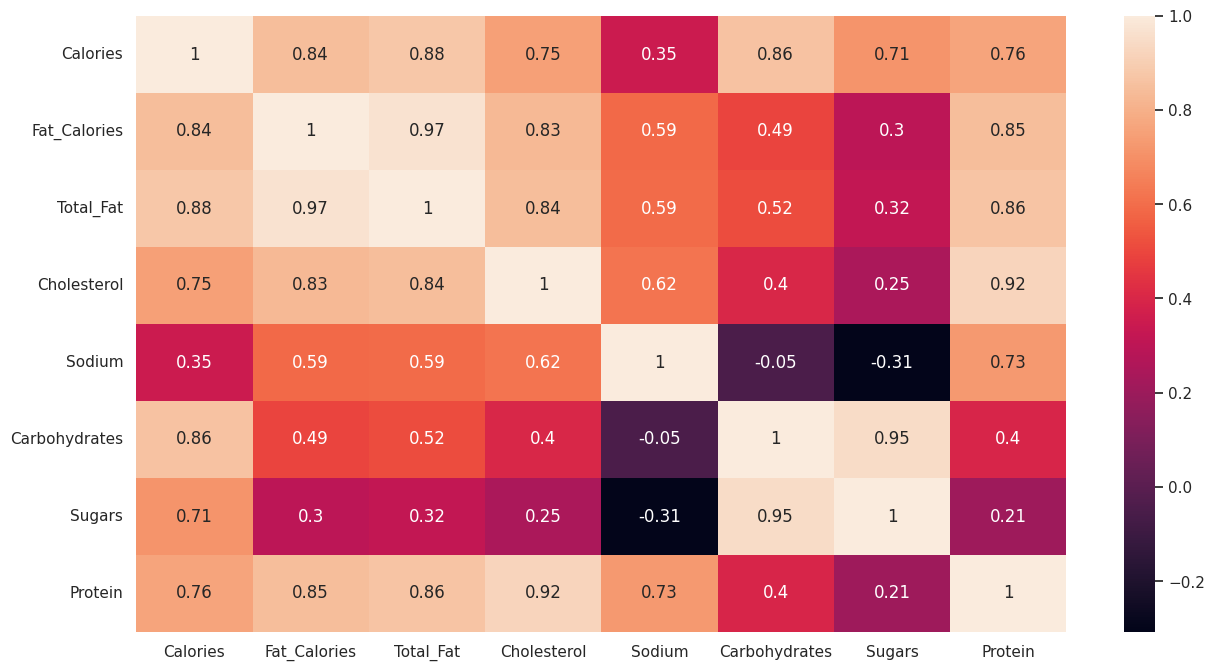

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

In [13]:
df[df.duplicated()]

,Menu,Calories,Fat_Calories,Total_Fat,Cholesterol,Sodium,Carbohydrates,Sugars,Protein
42,Hamburger,320,120,13.0,35,870,36,7,15.0
43,Hot Dog,330,170,19.0,35,820,25,3,12.0


In [14]:
df.drop_duplicates(inplace=True)

In [32]:
brands = df.groupby('Protein').count()[['Total_Fat']].sort_values(by='Total_Fat', ascending=True).reset_index()
brands = brands.rename(columns={'Total_Fat':'Calories'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.3'),
  Text(2, 0, '0.5'),
  Text(3, 0, '1.0'),
  Text(4, 0, '2.0'),
  Text(5, 0, '3.0'),
  Text(6, 0, '4.0'),
  Text(7, 0, '5.0'),
  Text(8, 0, '6.0'),
  Text(9, 0, '7.0'),
  Text(10, 0, '8.0'),
  Text(11, 0, '9.0'),
  Text(12, 0, '10.0'),
  Text(13, 0, '11.0'),
  Text(14, 0, '12.0'),
  Text(15, 0, '13.0'),
  Text(16, 0, '14.0'),
  Text(17, 0, '15.0'),
  Text(18, 0, '16.0'),
  Text(19, 0, '17.0'),
  Text(20, 0, '18.0'),
  Text(21, 0, '19.0'),
  Text(22, 0, '20.0'),
  Text(23, 0, '21.0'),
  Text(24, 0, '22.0'),
  Text(25, 0, '23.0'),
  Text(26, 0, '24.0'),
  Text(27, 0, '25.0'),
  Text(28, 0, '28.0'),
  Text(29, 0, '29.0'),
  Text(30, 0, '30.0'),
  Text(31, 0, '32.0'),
  Text(32, 0, '33.0'),
  Text(33, 0, '34.0'),
  Text(34, 0, '36.0'),
  Text(35, 0, '37.0'),


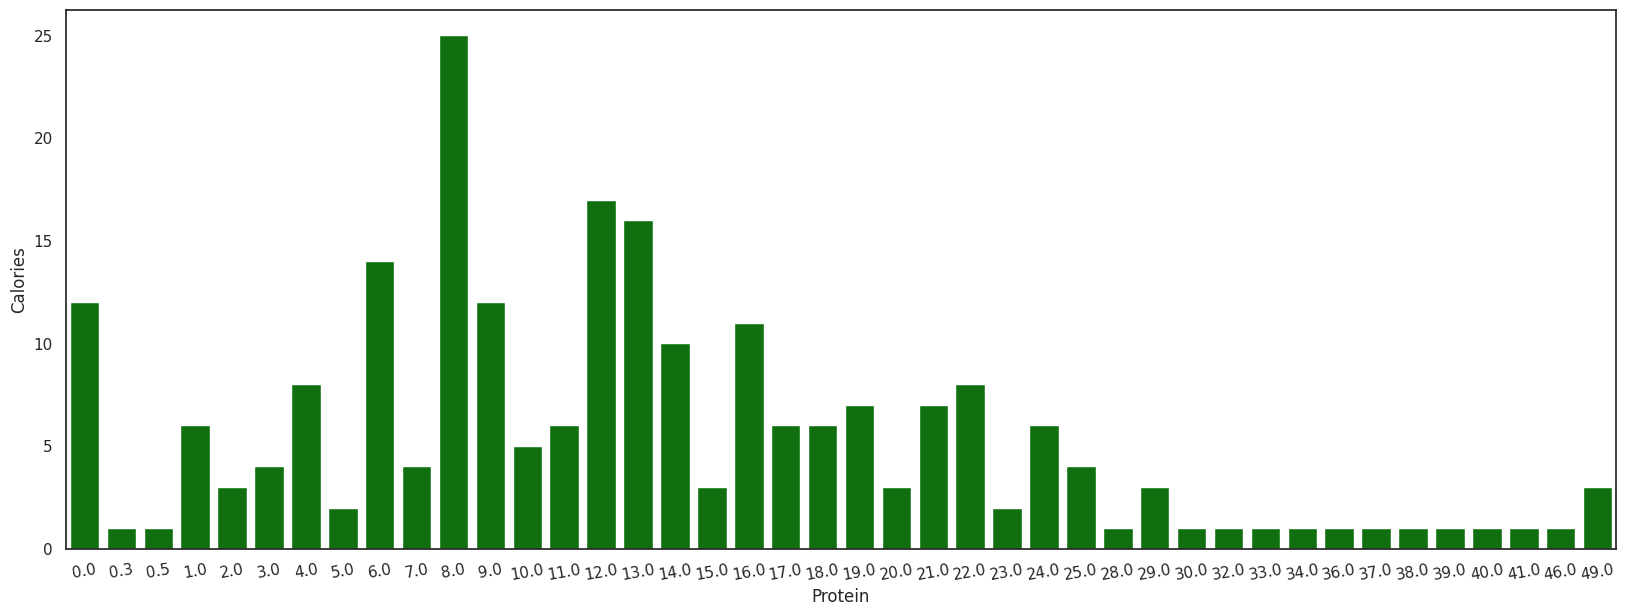

In [33]:
fig = plt.figure(figsize = (20,7))
sns.barplot(x = brands['Protein'], y = brands['Calories'], color = 'green')
plt.xticks(rotation = 10)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
fitur = ['Cholesterol', 'Sugars', 'Fat_Calories', 'Total_Fat', 'Carbohydrates', 'Sodium', 'Protein']
x = df[fitur]
y = df['Calories']
x.shape, y.shape

((227, 7), (227,))

In [36]:
x_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 70)
y_test.shape

(57,)

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predik = lr.predict(X_test)

In [38]:
y = lr.score(X_test, y_test)
print('Akurasi Model Regresi Linier : ', y)

Akurasi Model Regresi Linier :  0.9991840271557658


In [39]:
#Cholesterols(mg) = 125 , Carbohydrate(g) = 37 , Sugars(g) = 7 , Protein(g) = 34, Total_Fat(g) = 49, Fat_Calories(kg) = 21, Sodium(kg) = 56,
inputan = np.array([[11, 7, 7, 34, 49, 21, 2]])
prediksi = lr.predict(inputan)
print('Estimasi Jumlah Energi dalam setiap size menu  : ', prediksi)

Estimasi Jumlah Energi dalam setiap size menu  :  [501.43717406]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
predictions = lr.predict(X_test)

In [41]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.694105493866003
MSE: 66.56722285450142
RMSE: 8.158873871711796


In [42]:
print('Variance:', metrics.explained_variance_score(y_test, predictions))

Variance: 0.999186076445628


In [43]:
import pickle
filename = 'estimasi_kalori.sav'
pickle.dump(lr,open(filename,'wb'))